Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score,accuracy_score,make_scorer,classification_report
from sklearn.ensemble import ExtraTreesClassifier

from jupyterthemes import jtplot
jtplot.style()

In [2]:
# Unzip the file
#!unzip file.zip

Read the CSV 

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df = df_train

# EDA Visualization

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

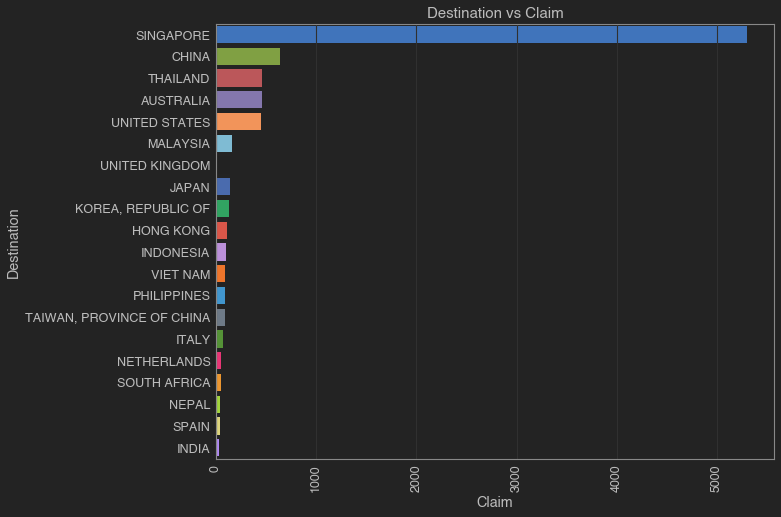

In [3]:
Data_per_country = df.groupby(["Destination"])["Claim"].sum().reset_index().sort_values("Claim",ascending=False).reset_index(drop=True)
top10_claim_countries = Data_per_country.iloc[:20]
top10_claim_countries

plt.figure(figsize=[10,8])
sns.barplot(top10_claim_countries['Claim'],top10_claim_countries['Destination'],saturation=.85,errcolor='.045',ci=None)
plt.title('Destination vs Claim',fontsize=15,loc='center')
plt.xticks(rotation = 90)

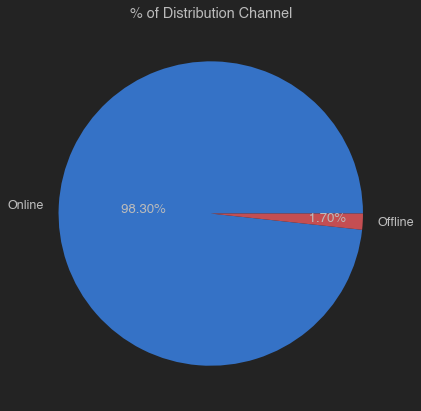

In [4]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'Online', 'Offline'
s1 = (df['Distribution Channel']=='Online').sum()
# s1.value_counts()
s2 = (df['Distribution Channel'] =='Offline').sum()
s2
data1 = [s1, s2]
colors = ['b', 'r']
#explode = (0.1, 0,)  # explode 1st slice
fig = plt.figure(figsize =(10, 7)) 
plt.pie(data1, labels = labels, colors= colors,autopct='%18.2f%%') 
plt.title('% of Distribution Channel')
plt.show() 

Text(0.5, 1.0, 'Total % of claim')

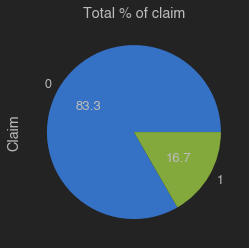

In [5]:
plt.figure(figsize=(10,7))
df['Claim'].value_counts().plot.pie(figsize=(6,4),autopct='%.1f')
plt.title('Total % of claim')

<AxesSubplot:>

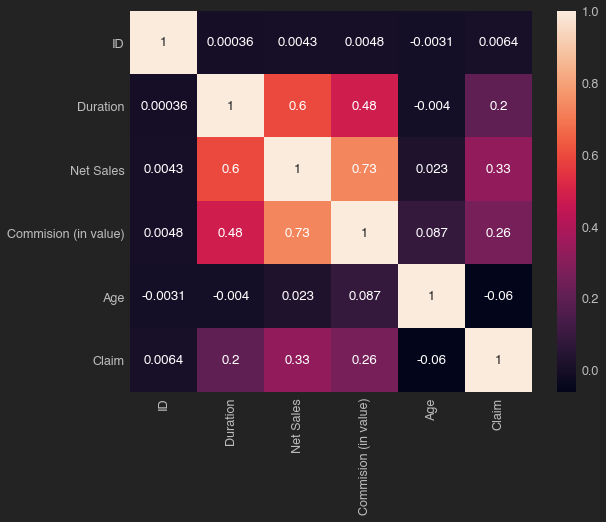

In [6]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(), annot=True, fmt = '.2g')

<AxesSubplot:xlabel='Age', ylabel='Claim'>

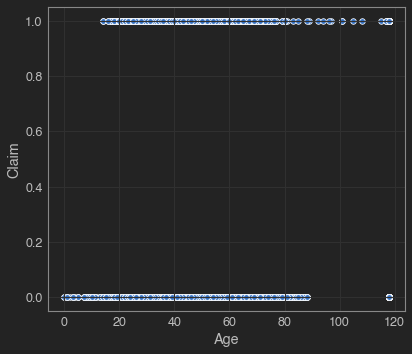

In [7]:
sns.scatterplot(df['Age'], df['Claim'])

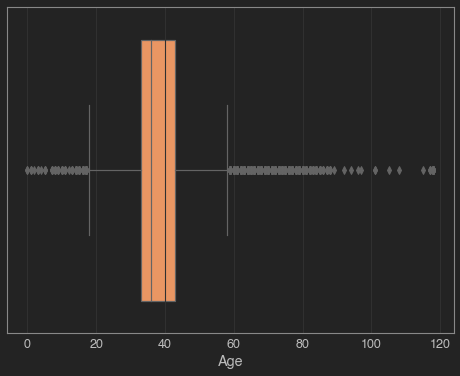

In [8]:
d1 = df['Age']
d2 = df['Net Sales']
d3 = df['Commision (in value)']
d4 = df['Duration']
fig = plt.figure(figsize =(8,6)) 
# Creating plot 
sns.boxplot(d1,hue=df['Claim'], color='y')
plt.show() 

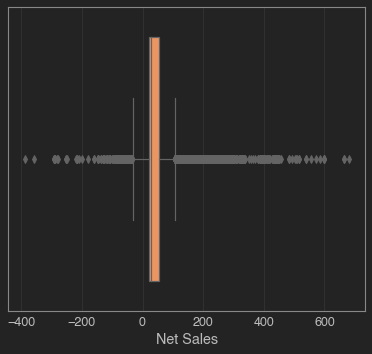

In [9]:
sns.boxplot(d2,hue=df['Claim'],color='y')
plt.show() 

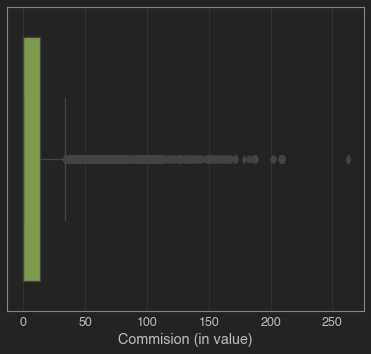

In [10]:
sns.boxplot(d3,hue=df['Claim'],color='g')
plt.show() 

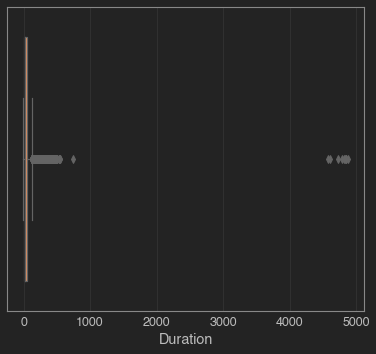

In [11]:
sns.boxplot(d4,hue=df['Claim'], color='y')
plt.show() 

# EDA

In [12]:
df_train.shape

(52310, 11)

In [13]:
df_test.shape

(22421, 10)

In [14]:
df_train.head(5)

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


In [15]:
df_test.head(5)

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age
0,17631,EPX,Travel Agency,Online,Cancellation Plan,192,HONG KONG,18.0,0.00,36
1,15064,EPX,Travel Agency,Online,1 way Comprehensive Plan,2,SINGAPORE,20.0,0.00,36
2,14139,C2B,Airlines,Online,Bronze Plan,13,SINGAPORE,13.5,3.38,24
3,19754,EPX,Travel Agency,Online,2 way Comprehensive Plan,133,"TAIWAN, PROVINCE OF CHINA",41.0,0.00,36
4,16439,C2B,Airlines,Online,Silver Plan,2,SINGAPORE,30.0,7.50,32


In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52310 entries, 0 to 52309
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    52310 non-null  int64  
 1   Agency                52310 non-null  object 
 2   Agency Type           52310 non-null  object 
 3   Distribution Channel  52310 non-null  object 
 4   Product Name          52310 non-null  object 
 5   Duration              52310 non-null  int64  
 6   Destination           52310 non-null  object 
 7   Net Sales             52310 non-null  float64
 8   Commision (in value)  52310 non-null  float64
 9   Age                   52310 non-null  int64  
 10  Claim                 52310 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 4.4+ MB


* check the null values 

In [17]:
df_train.isna().sum()

ID                      0
Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
Claim                   0
dtype: int64

In [18]:
df_test.isna().sum()

ID                      0
Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Duration                0
Destination             0
Net Sales               0
Commision (in value)    0
Age                     0
dtype: int64

* Description of Dataset

In [19]:
df_train.describe()

,ID,Duration,Net Sales,Commision (in value),Age,Claim
count,52310.000000,52310.000000,52310.000000,52310.000000,52310.000000,52310.000000
mean,6005.745804,58.256108,48.554673,12.219963,39.555725,0.166699
std,2306.450475,109.138708,60.198589,22.847645,13.762473,0.372710
min,2000.000000,-2.000000,-389.000000,0.000000,0.000000,0.000000
25%,4015.000000,10.000000,19.800000,0.000000,33.000000,0.000000
50%,6002.000000,24.000000,29.500000,0.000000,36.000000,0.000000
75%,8004.000000,57.000000,55.000000,13.380000,43.000000,0.000000
max,10000.000000,4881.000000,682.000000,262.760000,118.000000,1.000000


In [20]:
df_test.describe()

,ID,Duration,Net Sales,Commision (in value),Age
count,22421.000000,22421.000000,22421.000000,22421.000000,22421.000000
mean,15499.196646,59.100665,49.446070,12.316924,39.784889
std,2606.751171,114.819397,61.794609,22.957306,13.910773
min,11000.000000,-1.000000,-297.000000,0.000000,1.000000
25%,13236.000000,10.000000,19.800000,0.000000,34.000000
50%,15515.000000,24.000000,29.518868,0.000000,36.000000
75%,17762.000000,58.000000,56.000000,13.630000,43.000000
max,20000.000000,4857.000000,810.000000,283.500000,118.000000


* Check the counts of agencies

In [21]:
df_train['Agency'].groupby(df['Agency']).count()

Agency
ADM       56
ART      223
C2B    10615
CBH       76
CCR      156
CSR       60
CWT     6813
EPX    26218
JWT      550
JZI     4619
KML      313
LWC      806
RAB      527
SSI      780
TST      394
TTW      104
Name: Agency, dtype: int64

* Check the counts of product_names

In [22]:
df_train['Product Name'].groupby(df['Product Name']).count()

Product Name
1 way Comprehensive Plan                 2409
2 way Comprehensive Plan                10555
24 Protect                                165
Annual Gold Plan                          295
Annual Silver Plan                       2348
Annual Travel Protect Gold                183
Annual Travel Protect Platinum             50
Annual Travel Protect Silver               92
Basic Plan                               4042
Bronze Plan                              4723
Cancellation Plan                       13254
Child Comprehensive Plan                    8
Comprehensive Plan                        278
Gold Plan                                 380
Individual Comprehensive Plan              84
Premier Plan                              141
Rental Vehicle Excess Insurance          6813
Silver Plan                              2862
Single Trip Travel Protect Gold           251
Single Trip Travel Protect Platinum       100
Single Trip Travel Protect Silver         130
Spouse or Parents Com

In [23]:
df['Age'].mean()

39.555725482699295

In [24]:
# To show full records
pd.set_option("display.max_rows", None, "display.max_columns", None)
df_train['Distribution Channel'].value_counts()

Online     51419
Offline      891
Name: Distribution Channel, dtype: int64

## Feature Engg. 

In [25]:
def improve_data(data, age_mean, duration_mean):
  data['Duration'] = abs(data['Duration'])
  data['Net Sales'] = abs(data['Net Sales'])
  data['Age'] = data.apply(lambda x: age_mean if x['Age'] > 100 else x['Age'], axis=1)
  data['Duration'] = data.apply(lambda x: duration_mean if x['Duration'] > 500 
                                else x['Duration'], axis=1)
  data['Agency'] = data.apply(lambda x: 'OTH' if x['Agency'] not in ['C2B','EPX','CWT','JZI']
                                else x['Agency'], axis=1)
  data_Product = data['Product Name'].value_counts().rename_axis('Product Name').reset_index(name='counts')
  data_Product = data_Product[data_Product['counts'] > 1000]
  #data_Product_LS = data_Product[data_Product['counts'] <= 1000]
  data['Product Name'] = data.apply(lambda x: 'High Sell' if x['Product Name'] in 
                                        list(data_Product['Product Name'])                                         
                                else 'Low Sell', axis=1)
  data_dest = data['Destination'].value_counts().rename_axis('Destination').reset_index(name='counts')
  data_dest = data_dest[data_dest['counts'] > 1000]
  data['Destination'] = data.apply(lambda x: 'Frequent' if x['Destination'] in 
                                        list(data_dest['Destination'])                                         
                                else 'Less Frequent', axis=1)

In [26]:
def get_merge_data(data, cat_columns, num_coulmns):
  #data = data.round({'Net Sales': 2, 'Commision (in value)': 2})
  df_category = data[cat_columns]
  x_enc = pd.get_dummies(df_category, columns=cat_columns)
  print(x_enc.shape)
  df_numeric = data[num_columns]
  merged_data = pd.concat([df_numeric,x_enc],axis=1)
  print(merged_data.shape)
  return merged_data

def get_features(data, y, count):
  model_features_importance=ExtraTreesClassifier()
  model_features_importance.fit(data,y)
  print(model_features_importance.feature_importances_)
  ranked_features=pd.Series(model_features_importance.feature_importances_,index=data.columns)
  ranked_features.nlargest(count).plot(kind='barh')
  return ranked_features.nlargest(count)

[4.22978562e-01 2.22329229e-01 3.36472851e-04 7.81321865e-02
 4.13299900e-05 9.87246469e-05 2.60421799e-05 3.67395443e-03
 2.33344395e-02 2.73361562e-04 6.55094448e-03 4.15034309e-04
 7.10820945e-03 8.11705093e-04 2.38086625e-03 3.63294602e-04
 5.25037226e-04 2.26649254e-02 8.75893353e-03 2.55407628e-04
 2.01423457e-03 2.66608203e-02 4.07758070e-03 3.20864920e-04
 7.61478176e-04 2.74926357e-03 1.59839333e-02 1.56856610e-02
 7.10511017e-05 1.92036522e-04 1.11260937e-03 9.09500862e-04
 2.39681236e-04 1.63647076e-03 1.36145787e-02 3.12377162e-03
 1.59821038e-03 1.35417756e-03 5.66502381e-05 2.66669873e-03
 3.54983180e-04 2.88402671e-03 2.95770091e-03 1.21567549e-04
 2.48929031e-06 1.23072309e-05 2.93526068e-05 5.64594465e-05
 4.13044000e-05 3.90170413e-08 1.19366468e-05 2.97927854e-07
 8.22706980e-06 5.98133326e-04 3.22960200e-04 4.85563517e-04
 1.10232769e-06 8.02232867e-03 1.33575413e-06 7.20221720e-05
 6.69102523e-05 1.64481928e-05 5.24625329e-05 1.33669839e-04
 1.18608837e-05 1.281686

<AxesSubplot:>

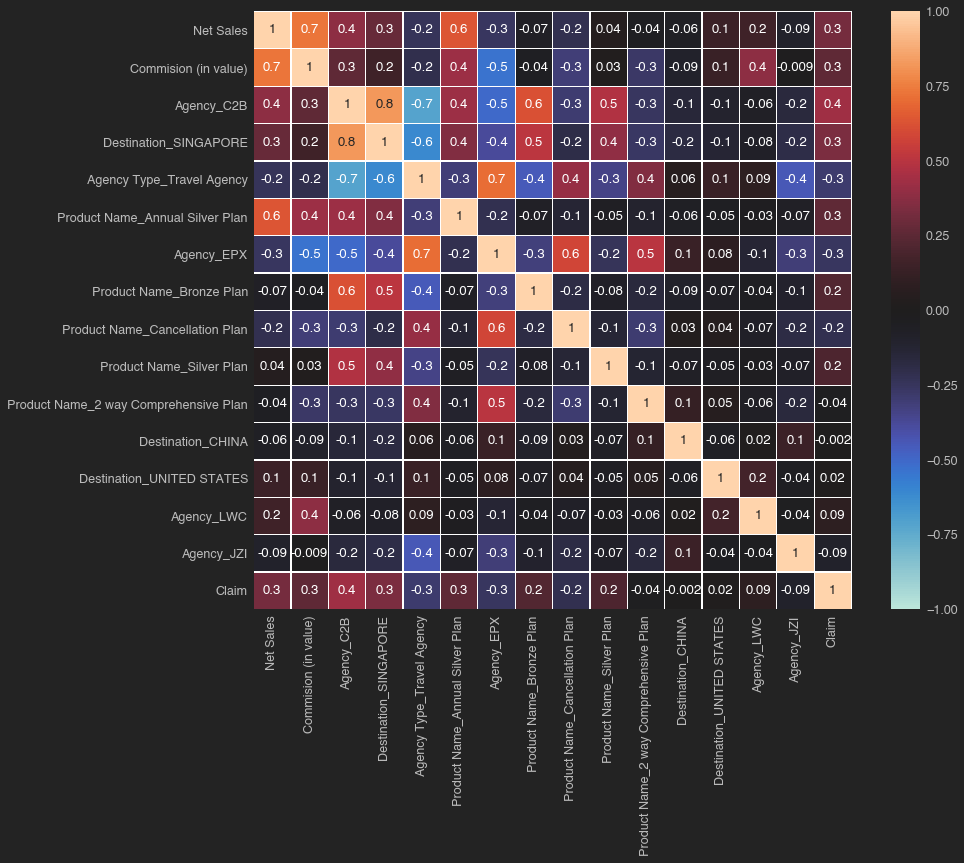

In [27]:
df_s = df[['Agency','Agency Type','Product Name','Destination','Net Sales','Commision (in value)']]
f_df = pd.get_dummies(df_s,columns=['Agency', 'Agency Type','Product Name','Destination'],drop_first=True)
x1 = f_df#.drop(['Claim','ID'],axis=1)
y1 = df['Claim']
model_features_importance = ExtraTreesClassifier()
model_features_importance.fit(x1,y1)
print(model_features_importance.feature_importances_)
ranked_features = pd.Series(model_features_importance.feature_importances_,index=x1.columns)
ranked_features.nlargest(15)#.plot(kind='barh')
top15 = ['Net Sales', 'Commision (in value)', 'Agency_C2B',
       'Destination_SINGAPORE', 'Agency Type_Travel Agency',
       'Product Name_Annual Silver Plan', 'Agency_EPX',
       'Product Name_Bronze Plan', 'Product Name_Cancellation Plan',
       'Product Name_Silver Plan', 'Product Name_2 way Comprehensive Plan',
       'Destination_CHINA', 'Destination_UNITED STATES', 'Agency_LWC',
       'Agency_JZI']
n_df1 = f_df[top15]
df_corr = pd.concat([n_df1, df['Claim']],axis=1)

plt.figure(figsize=(14,11))
sns.heatmap(df_corr.corr(), annot=True,
            linewidths=.25,
            square = True,
            vmin=-1, vmax=1,
            center= 0,
            fmt='.1g')

In [28]:
df_train_du = df_train
df_test_du = df_test
df_train_du.columns

Index(['ID', 'Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Duration', 'Destination', 'Net Sales', 'Commision (in value)', 'Age',
       'Claim'],
      dtype='object')

In [29]:
improve_data(df_train_du, df_train_du['Age'].mean(), df_train_du['Duration'].mean())
df_train_du.describe()

,ID,Duration,Net Sales,Commision (in value),Age,Claim
count,52310.000000,52310.000000,52310.000000,52310.000000,52310.000000,52310.000000
mean,6005.745804,57.378782,49.685823,12.219963,38.451722,0.166699
std,2306.450475,89.751357,59.268401,22.847645,10.082681,0.372710
min,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4015.000000,10.000000,20.000000,0.000000,33.000000,0.000000
50%,6002.000000,24.000000,29.700000,0.000000,36.000000,0.000000
75%,8004.000000,57.000000,56.342501,13.380000,42.000000,0.000000
max,10000.000000,497.000000,682.000000,262.760000,97.000000,1.000000


In [30]:
#df_train_du['Destination'] == 'Less Frequent'
df_train_du['Destination'].value_counts()

Frequent         44975
Less Frequent     7335
Name: Destination, dtype: int64

In [31]:
df_train_du['Product Name'].value_counts()

High Sell    48967
Low Sell      3343
Name: Product Name, dtype: int64

* Features Selection for model training

(52310, 11)
(52310, 13)
[0.49988742 0.24039292 0.13010008 0.00221434 0.01656083 0.02184475
 0.00900057 0.04018313 0.02130807 0.00324397 0.00279356 0.00570042
 0.00676996]


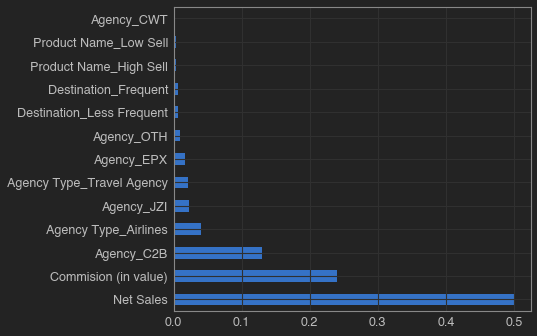

In [32]:
cat_columns = ['Agency', 'Agency Type', 'Product Name', 'Destination']#,'Agency Type','Destination'
num_columns = ['Net Sales','Commision (in value)'] #'Commision (in value)'
y = df_train_du['Claim']
merged_data = get_merge_data(df_train_du, cat_columns, num_columns)
ranked_features = get_features(merged_data, y, 100)
merged_data_fe = merged_data[ranked_features.index]

In [33]:
merged_data.shape

(52310, 13)

* Split the data

In [34]:
X_train,X_test,y_train,y_test = train_test_split(merged_data,y,test_size=0.1,random_state=43)

Checking for Class imbalance and tackling it.

* For Claim 1, output label=1, for any other claim output label=0

In [35]:
y_train=((y_train==1).astype(int))  
y_test=((y_test==1).astype(int))
y_train.value_counts()

0    39195
1     7884
Name: Claim, dtype: int64

In [36]:
y_test.value_counts()

0    4395
1     836
Name: Claim, dtype: int64

#  Model Training 

In [37]:
# Train the model
from sklearn.ensemble import RandomForestClassifier

#reg=RandomForestClassifier(n_estimators=300, max_depth=50, class_weight={0:1,1:1}, n_jobs=-1).fit(X_train,y_train)
#reg=RandomForestClassifier(n_estimators=300, max_depth=50, class_weight={0:830,1:1}).fit(X_train,y_train)
reg=RandomForestClassifier(n_estimators=60, max_depth=40, class_weight={0:30,1:1}).fit(X_train,y_train)
y_pred=reg.predict(X_train)
predict_score=precision_score(y_train,y_pred)
print('Precision Score for train is :',predict_score)
con_matrix = confusion_matrix(y_train,y_pred)
print('Confusion Matrix for train is :',con_matrix)
accuracy = accuracy_score(y_train,y_pred)
print('Accuracy is :',accuracy)

y_predict=reg.predict(X_test)
predict_score=precision_score(y_test,y_predict)

Precision Score for train is : 1.0
Confusion Matrix for train is : [[39195     0]
 [ 2841  5043]]
Accuracy is : 0.9396546230803543


# Model Results

In [39]:
print('Precision Score for test is :',predict_score)
accuracy = accuracy_score(y_test,y_predict)
print('Accuracy is :',accuracy)
con_matrix = confusion_matrix(y_test,y_predict)
print('Confusion Matrix is :',con_matrix)
classification_report_ = classification_report(y_test,y_predict)
print(classification_report_)

Precision Score for test is : 0.9804772234273319
Accuracy is : 0.9248709615752246
Confusion Matrix is : [[4386    9]
 [ 384  452]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      4395
           1       0.98      0.54      0.70       836

    accuracy                           0.92      5231
   macro avg       0.95      0.77      0.83      5231
weighted avg       0.93      0.92      0.92      5231



# Prediction on test data

In [40]:
# Predict the Test
improve_data(df_test_du, df_test_du['Age'].mean(), df_test_du['Duration'].mean())
#df_test_du.describe()
#create_new_feature(df_test_1)
merged_test_data = get_merge_data(df_test_du, cat_columns, num_columns)
#merged_test_data_fe = merged_test_data[ranked_features.index]
y_test_pred = reg.predict(merged_test_data)
y_test_pred

(22421, 11)
(22421, 13)


array([0, 0, 0, ..., 0, 0, 0])

* Creating dataframe of output and ID 

In [41]:
output = pd.DataFrame(zip(df_test['ID'], y_test_pred), columns=['ID','Claim'])

output.to_csv('AMRS_results.csv',index=False)